In [1]:
#####################################################
#
# Problema para el calculo de las conversion en base a RTD
#
# Realizado por
# Ali Gabriel Lara
#
# Fecha: Mayo 2014
# Revision: Ninguna
#

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
# Parametros fijos del problema
#
# Datos de Concentracion del trazador en g/m^3 vs tiempo en min 
c = np.array([1, 5, 8, 10, 8, 6, 4, 3, 2.2, 1.5, 0.6, 0])
t = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14])
#
# Datos cineticos
k = 0.1     # min^(-1)
rA = lambda c: k * c 

In [5]:
#########################################################################
## Calculo de la curva RTD del sistema
# la curva RTD seria simplemente 
E = c/trapezoid(c, t) 
X = lambda time: 1 - np.exp(-k*time)
Xbatch = X(t)

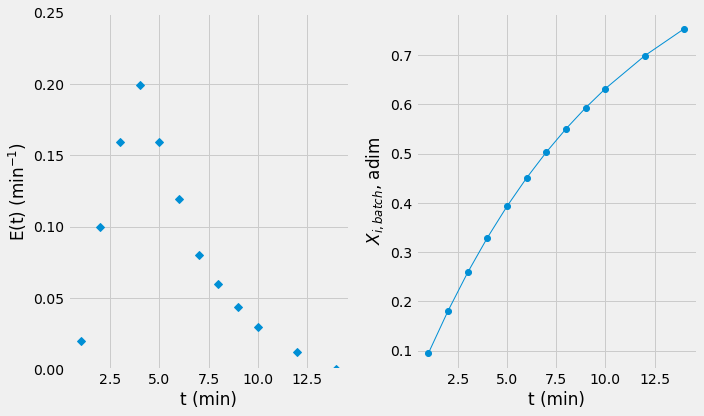

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.plot(t, E, 
         markersize = 6, marker='D',
         ls = 'None') 
ax1.set_ylim([0, 0.25]) 
ax1.set_xlabel('t (min)') 
ax1.set_ylabel(r'E(t) (min$^{-1}$)') 

ax2.plot(t, Xbatch,
         markersize = 6, marker='o',
         lw = 1
        )
ax2.set_xlabel('t (min)') 
ax2.set_ylabel(r'$X_{i,batch}$, adim')

plt.tight_layout()
plt.show()

In [7]:
# De esta manera la conversion promedio puede ser estimada como
Xprom = trapezoid(X(t)*E, t)*100 
print('La conversion promedio es igual a {:1.2f}%'.format(Xprom)) 

La conversion promedio es igual a 38.71%
